### VAR only applicable for stationary data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import VAR, DynamicVAR
from pandas import DataFrame
import tqdm
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('data.csv',index_col=0)
data = data.set_index(data.timestamp)
data.head()

,address,x,y,z,timestamp
timestamp,,,,,
2018-07-01 00:55:41.678,-6196490120761152012,-47.9602,-59.9457,6.24468,2018-07-01 00:55:41.678
2018-07-01 00:55:42.923,-6196490120761152012,-46.4965,-60.0888,6.25606,2018-07-01 00:55:42.923
2018-07-01 00:55:44.163,-6196490120761152012,-45.1626,-60.3775,6.46899,2018-07-01 00:55:44.163
2018-07-01 00:55:45.412,-6196490120761152012,-44.1827,-60.4705,6.57457,2018-07-01 00:55:45.412
2018-07-01 00:55:46.704,-6196490120761152012,-43.9995,-60.4705,6.58655,2018-07-01 00:55:46.704


In [3]:
data['x'] = data['x'] + 1.0
data['y'] = data['y'] + 1.0
data['z'] = data['z'] + 1.0

In [4]:
data.head()

,address,x,y,z,timestamp
timestamp,,,,,
2018-07-01 00:55:41.678,-6196490120761152012,-46.9602,-58.9457,7.24468,2018-07-01 00:55:41.678
2018-07-01 00:55:42.923,-6196490120761152012,-45.4965,-59.0888,7.25606,2018-07-01 00:55:42.923
2018-07-01 00:55:44.163,-6196490120761152012,-44.1626,-59.3775,7.46899,2018-07-01 00:55:44.163
2018-07-01 00:55:45.412,-6196490120761152012,-43.1827,-59.4705,7.57457,2018-07-01 00:55:45.412
2018-07-01 00:55:46.704,-6196490120761152012,-42.9995,-59.4705,7.58655,2018-07-01 00:55:46.704


In [5]:
mdata = data[['x','y','z']]

In [6]:
data = np.log(mdata).diff().dropna()

C:\Users\saran\AppData\Local\conda\conda\envs\py35\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [7]:
# scaler = MinMaxScaler()

In [8]:
# scalar = scaler.fit_transform(data[['x','y','z']])

In [9]:
# scalar

In [10]:
model = VAR(data)

C:\Users\saran\AppData\Local\conda\conda\envs\py35\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [17]:
results = model.fit(2)


In [18]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 03, Dec, 2018
Time:                     00:51:10
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -15.1879
Nobs:                     6354.00    HQIC:                  -15.2025
Log likelihood:           21296.2    FPE:                2.47893e-07
AIC:                     -15.2103    Det(Omega_mle):     2.47075e-07
--------------------------------------------------------------------
Results for equation x
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.000014         0.000104            0.131           0.896
L1.x         -0.028859         0.015275           -1.889           0.059
L1.y         -0.000196         0.000325           -0.604           0.546
L1.z         -0.000750 

In [19]:
print(results.pvalues['x']<0.05)
print(results.pvalues['x'])

const    False
L1.x     False
L1.y     False
L1.z     False
L2.x      True
L2.y     False
L2.z      True
Name: x, dtype: bool
const    0.895678
L1.x     0.058854
L1.y     0.546043
L1.z     0.217284
L2.x     0.000002
L2.y     0.224909
L2.z     0.007554
Name: x, dtype: float64


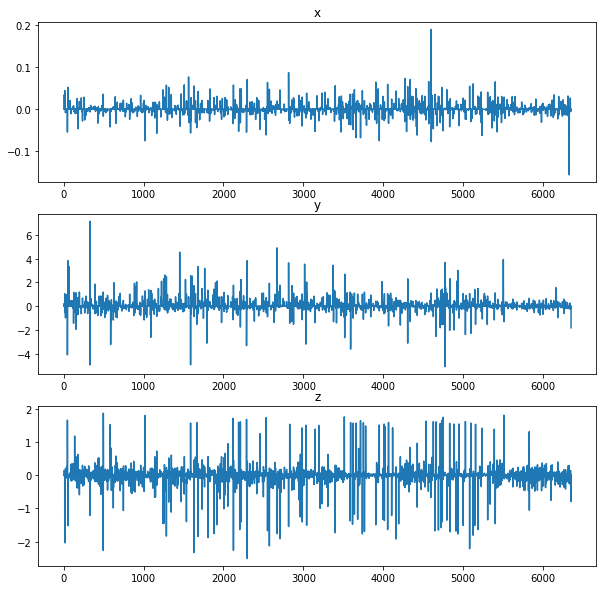

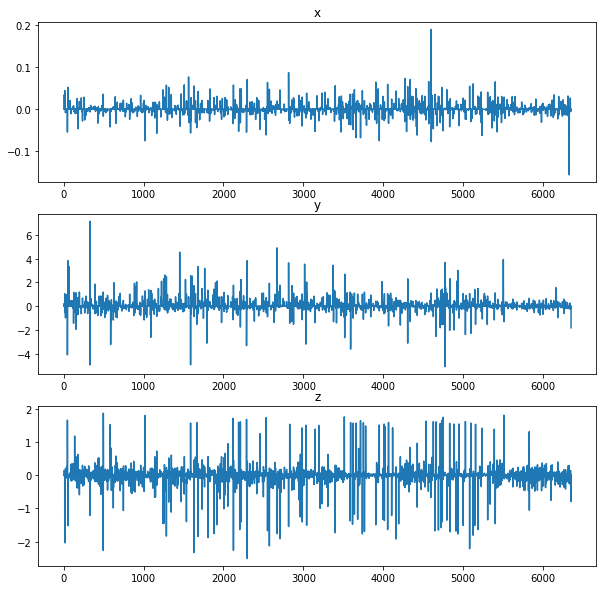

In [74]:
results.plot()

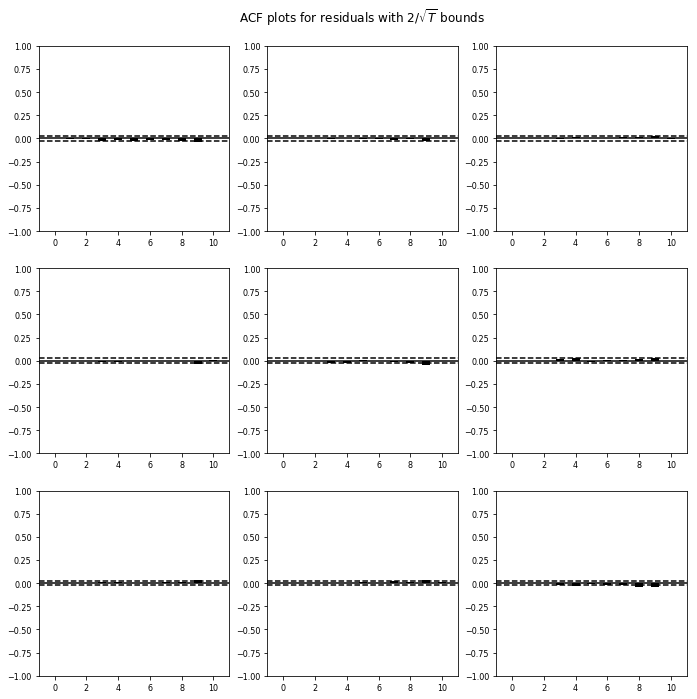

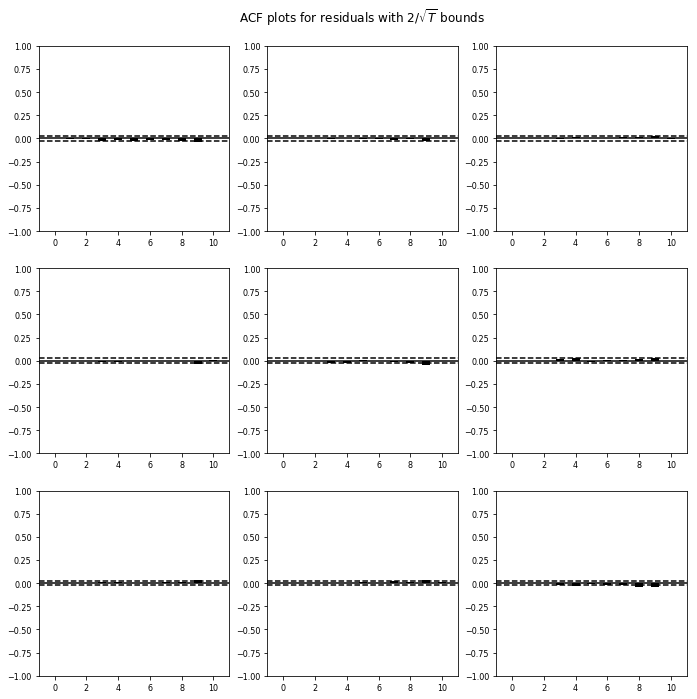

In [75]:
results.plot_acorr()

#### Lag order selection
Choice of lag order can be a difficult problem. 
Standard analysis employs likelihood test or information criteria-based order selection. 
We have implemented the latter, accessible through the VAR class:

In [76]:
model.select_order(15)

##### When calling the fit function, one can pass a maximum number of lags and the order criterion to use for order selection:

In [77]:
results = model.fit(maxlags=15, ic='aic')

### Forecasting
The linear predictor is the optimal h-step ahead forecast in terms of mean-squared error:

We can use the forecast function to produce this forecast. Note that we have to specify the “initial value” for the forecast:

In [78]:
lag_order = results.k_ar
lag_order

9

In [79]:
data.values

array([[ 3.32086979e-02,  0.00000000e+00,  1.25285438e-01],
       [ 0.00000000e+00,  2.01929954e-01,  0.00000000e+00],
       [ 0.00000000e+00,  5.17253437e-02,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -1.89463278e-02],
       [ 0.00000000e+00, -5.00576865e-02, -7.94041622e-01],
       [-2.81667145e-04, -1.81406418e+00,  0.00000000e+00]])

In [80]:
results.forecast(data.values[-lag_order:], 90)

array([[ 2.24521677e-03,  5.02173479e-02,  1.91239019e-02],
       [ 2.19921318e-03,  1.89361727e-02,  2.44116281e-02],
       [ 3.05976657e-04,  3.36747614e-02,  5.64244594e-02],
       [ 2.96304225e-04,  7.40791410e-02,  4.08469351e-02],
       [ 3.20519342e-04,  2.77012287e-02,  1.88086430e-02],
       [ 9.31718658e-05,  2.97190595e-02,  1.52044650e-02],
       [-8.30342583e-05,  1.38267100e-02,  1.87234709e-02],
       [-4.04628532e-04,  5.02372689e-02,  1.47689757e-02],
       [ 4.24719358e-04,  9.62305017e-02, -3.20357961e-02],
       [-3.06552674e-04,  1.71751665e-02, -1.00538743e-02],
       [-1.70081092e-04,  1.84794025e-02, -9.27269414e-03],
       [ 1.30184167e-05,  1.69752713e-02, -9.59871731e-03],
       [ 5.80199144e-06,  1.53479525e-02, -5.38780261e-03],
       [ 2.21654219e-05,  1.95017110e-02, -4.07494784e-03],
       [ 2.79400308e-05,  1.93737832e-02, -3.52645010e-03],
       [ 3.30522953e-05,  1.92562587e-02, -2.75559181e-03],
       [ 2.88331594e-05,  1.69134855e-02

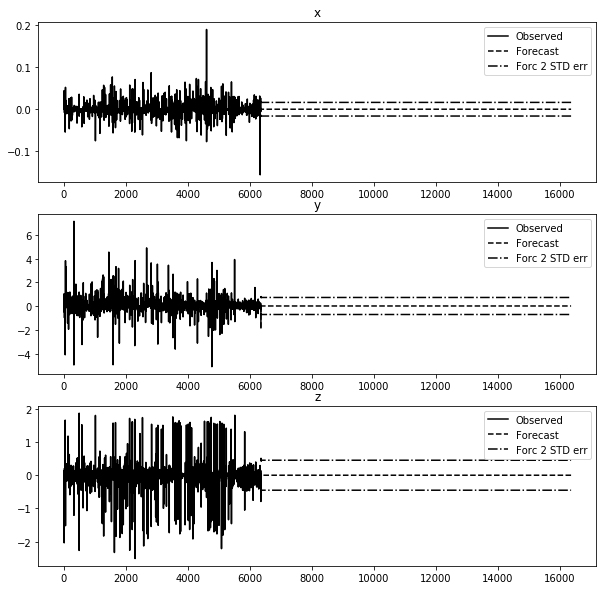

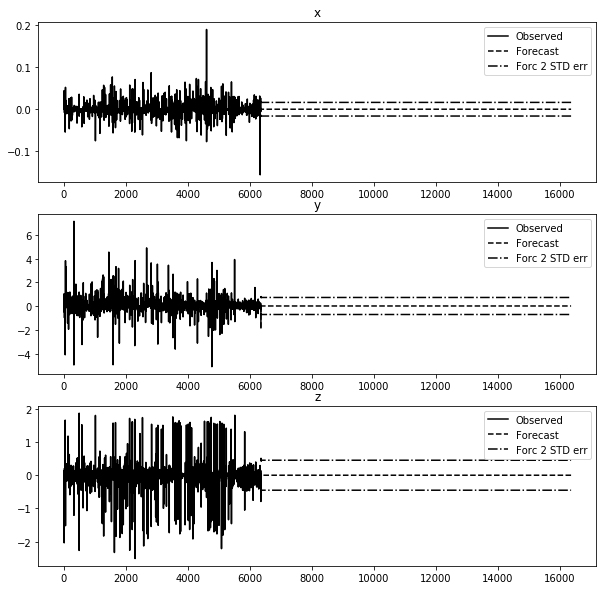

In [81]:
results.plot_forecast(10000)